In [1]:
from google.colab import files
uploaded = files.upload()

Saving retail_price.csv to retail_price.csv


In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Model processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# Model building
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Model evaluation
from sklearn.metrics import mean_absolute_error, r2_score
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance

# Statistical modeling
import statsmodels.formula.api as smf
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=a041da932695152aa16abf8344036495a9328f6bac228bec0254cea255d4c105
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [3]:
# loading dataset
df = pd.read_csv('retail_price.csv')

In [4]:
#first 10 rows of the dataset
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
product_id,bed1,bed1,bed1,bed1,bed1,bed1,bed1,bed1,bed1,bed1
product_category_name,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table,bed_bath_table
month_year,01-05-2017,01-06-2017,01-07-2017,01-08-2017,01-09-2017,01-10-2017,01-11-2017,01-12-2017,01-01-2018,01-02-2018
qty,1,3,6,4,2,3,11,6,19,18
total_price,45.95,137.85,275.7,183.8,91.9,137.85,445.85,239.94,759.81,719.82
freight_price,15.1,12.933333,14.84,14.2875,15.1,15.1,15.832727,15.23,16.533684,13.749444
unit_price,45.95,45.95,45.95,45.95,45.95,45.95,40.531818,39.99,39.99,39.99
product_name_lenght,39,39,39,39,39,39,39,39,39,39
product_description_lenght,161,161,161,161,161,161,161,161,161,161
product_photos_qty,2,2,2,2,2,2,2,2,2,2


In [5]:
# information about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  676 non-null    object 
 1   product_category_name       676 non-null    object 
 2   month_year                  676 non-null    object 
 3   qty                         676 non-null    int64  
 4   total_price                 676 non-null    float64
 5   freight_price               676 non-null    float64
 6   unit_price                  676 non-null    float64
 7   product_name_lenght         676 non-null    int64  
 8   product_description_lenght  676 non-null    int64  
 9   product_photos_qty          676 non-null    int64  
 10  product_weight_g            676 non-null    int64  
 11  product_score               676 non-null    float64
 12  customers                   676 non-null    int64  
 13  weekday                     676 non

In [6]:
df.shape

(676, 30)

In [7]:
# statistical description of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
qty,676.0,14.495562,15.443421,1.000000,4.000000,10.000000,18.000000,122.00
total_price,676.0,1422.708728,1700.123100,19.900000,333.700000,807.890000,1887.322500,12095.00
freight_price,676.0,20.682270,10.081817,0.000000,14.761912,17.518472,22.713558,79.76
unit_price,676.0,106.496800,76.182972,19.900000,53.900000,89.900000,129.990000,364.00
product_name_lenght,676.0,48.720414,9.420715,29.000000,40.000000,51.000000,57.000000,60.00
product_description_lenght,676.0,767.399408,655.205015,100.000000,339.000000,501.000000,903.000000,3006.00
product_photos_qty,676.0,1.994083,1.420473,1.000000,1.000000,1.500000,2.000000,8.00
product_weight_g,676.0,1847.498521,2274.808483,100.000000,348.000000,950.000000,1850.000000,9750.00
product_score,676.0,4.085503,0.232021,3.300000,3.900000,4.100000,4.200000,4.50
customers,676.0,81.028107,62.055560,1.000000,34.000000,62.000000,116.000000,339.00


In [8]:
# statistical description of categorical columns in the dataset
df.describe(include = 'object')

,product_id,product_category_name,month_year
count,676,676,676
unique,52,9,20
top,health5,garden_tools,01-03-2018
freq,20,160,50


In [9]:
# checking for null values
any(df.isnull().sum()>1)

False

In [10]:
# checking for duplicated values
any(df.duplicated())

False

# Exploratory Data Analysis

In [11]:
# distritbution of total price
fig = px.histogram(df, x = "total_price" , nbins = 20, title = "Distribution of Total Price")
fig.show()

In [12]:
# disttribution of unit price
fig = px.box(df, y = 'unit_price', title = "Distribution of Unit Price")
fig.show()

In [13]:
# relationship between quantity and total prices
fig = px.scatter(df, x = 'qty', y = 'total_price',trendline = 'ols', title = 'Relation of Quantity & Total Price')
fig.show()

In [14]:
# bar plot of product category name and unit price
df_avg_unit_price = df.groupby('product_category_name', as_index = False).mean('unit_price')
fig = px.bar(df_avg_unit_price, x = 'product_category_name', y = 'unit_price', title = "Unit Price by Product Category")
fig.update_xaxes(title_text = 'Product Category')
fig.update_yaxes(title_text = 'Avg of Unit Price')
fig.show()

**Time Series Analysis**

In [15]:
# distribution of total price by weekday
fig = px.box(df, y = 'total_price', x = 'weekday', title = "Total Price by Weekday")
fig.show()

In [16]:
# distribution of total price by weekend
fig = px.box(df, x = 'weekend', y = 'total_price', title = "Total Price by Weekend")
fig.show()

*Data Aggregation across Month*

In [17]:
df_month_year = df.groupby(['month_year']).agg({'qty':'sum',	'total_price':'sum',	'freight_price':'mean',
                                                'unit_price':'mean',	'weekday':'sum',	'weekend':'sum',	'customers':'sum'
                                                }).reset_index()
df_month_year['month_year']  = pd.to_datetime(df_month_year['month_year'], format = '%d-%m-%Y')
df_month = df_month_year.sort_values(['month_year'])
df_month.head()

,month_year,qty,total_price,freight_price,unit_price,weekday,weekend,customers
0,2017-01-01,9,2864.19,16.980625,207.445000,44,18,18
2,2017-02-01,35,3584.11,24.205315,127.827143,180,72,78
4,2017-03-01,101,10204.38,21.716536,122.586615,299,104,242
6,2017-04-01,121,11524.62,22.362675,119.288667,300,150,309
8,2017-05-01,222,21843.33,19.691432,104.785769,460,160,803


In [18]:
fig = px.scatter(df_month, x = 'weekend', y = 'total_price', title = 'Total Price by Total Weekend',
                  trendline = 'ols' )
fig.show()

In [19]:
fig = px.bar(df_month, x = 'month_year', y = 'customers', title = "Total Customers by Month")
fig.show()

**Competitor Comparison**

*Price Comparison*

In [20]:
df['comp_1_p_diff'] = df['unit_price'] - df['comp_1']
df['comp_2_p_diff'] = df['unit_price'] - df['comp_2']
df['comp_3_p_diff'] = df['unit_price'] - df['comp_3']

for i in range(1,4):
  comp = f"comp_{i}_p_diff"
  fig = px.bar(df,  x = df['product_category_name'], y = df[comp],
               title = f"Company {i} Price Difference per Unit",
               labels = {'product_category_name' : "product category",
                          comp : f" company {i} "})
  fig.show()

*Freight Values Comparison*

In [21]:
df['comp_1_fp_diff'] = df['freight_price'] - df['fp1']
df['comp_2_fp_diff'] = df['freight_price'] - df['fp2']
df['comp_3_fp_diff'] = df['freight_price'] - df['fp3']

for i in range(1,4):
  comp = f'comp_{i}_fp_diff'
  fig = px.bar(df, x = df['product_category_name'], y = df[comp],
               title = f'Company {i} Freight Price Difference',
               labels = {'product_category_name':'product category',
                         comp : f'company {i}'})
  fig.show()

**Price Elasticity of demand**

Measures the relative percentage change in Quantity of a good and services relative to the percentage change in the price of the goods and services

*Log-Log plot of Regregularice against Quantity observations*

In [22]:
# Apply log transformation
df_log = pd.DataFrame(df)
df_log['log_qty'] = np.log(df_log['qty'])
df_log['log_unit_price'] = np.log(df_log['unit_price'])
fig = px.scatter(df_log, x = 'log_qty', y = 'log_unit_price', title = 'Unit price and Quantity Observation')
fig.update_xaxes(title_text = 'Log of Qty')
fig.update_yaxes(title_text = 'Log of Unit price')
fig.show()

The above Log-Log plot shows the observed volume at every price in a scattered graph. The two Axes display the logarithm values of the two variables. Though the scatter suggests it might not be strongly linear, but still indicates some level of relationship between these two variables.

*Building a linear regression model*

In [23]:
ls_model = smf.ols(formula = 'qty ~ unit_price', data = df_log).fit()
print(ls_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    qty   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     7.289
Date:                Fri, 21 Jun 2024   Prob (F-statistic):            0.00711
Time:                        15:23:06   Log-Likelihood:                -2805.4
No. Observations:                 676   AIC:                             5615.
Df Residuals:                     674   BIC:                             5624.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.7285      1.017     16.454      0.0

 While the model shows statistical significance overall (F-statistic), the explanatory power (R-squared) is very low, suggesting that unit_price alone explains a small portion of the variability in quantity.

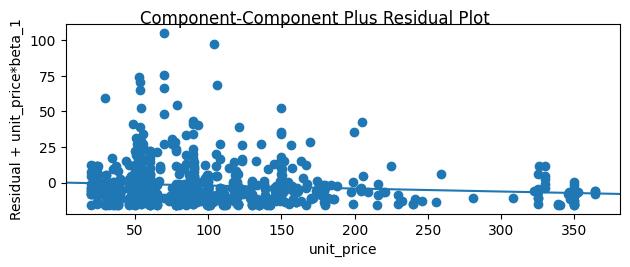

In [24]:
fig = sm.graphics.plot_ccpr_grid(ls_model)
plt.show()

The slight negative slope of the trend line remains, suggesting a weak negative linear relationship between unit_price and the residuals.

In [25]:
df_demand_schedule= pd.DataFrame(data=df)
df_demand_schedule

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,comp_3,ps3,fp3,lag_price,comp_1_p_diff,comp_2_p_diff,comp_3_p_diff,comp_1_fp_diff,comp_2_fp_diff,comp_3_fp_diff
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,45.95,4.0,15.100000,45.900000,-43.950000,-169.050000,0.000000,0.088103,6.340000,0.000000
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,45.95,4.0,12.933333,45.950000,-43.950000,-163.050000,0.000000,-1.835882,-8.388667,0.000000
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,45.95,4.0,14.840000,45.950000,-43.950000,-159.050000,0.000000,0.846167,-7.355932,0.000000
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,45.95,4.0,14.287500,45.950000,-43.950000,-153.559804,0.000000,-0.369257,-5.125385,0.000000
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,45.95,4.0,15.100000,45.950000,-43.950000,-117.448710,0.000000,-3.676522,-9.224687,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,45.95,4.0,15.100000,214.950000,125.100000,0.000000,169.050000,-6.251897,0.000000,-6.340000
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,45.95,4.0,12.933333,215.000000,119.100000,0.000000,163.050000,6.552784,0.000000,8.388667
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,45.95,4.0,14.840000,209.000000,115.100000,0.000000,159.050000,8.202099,0.000000,7.355932
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,45.95,4.0,14.287500,205.000000,109.609804,0.000000,153.559804,4.756128,0.000000,5.125385


In [26]:
df_demand_schedule['Price_Elasticity_of_Demand for regular']=(df_demand_schedule.qty.pct_change() / df_demand_schedule.unit_price.pct_change())
df_demand_schedule

,product_id,product_category_name,month_year,qty,total_price,freight_price,unit_price,product_name_lenght,product_description_lenght,product_photos_qty,...,ps3,fp3,lag_price,comp_1_p_diff,comp_2_p_diff,comp_3_p_diff,comp_1_fp_diff,comp_2_fp_diff,comp_3_fp_diff,Price_Elasticity_of_Demand for regular
0,bed1,bed_bath_table,01-05-2017,1,45.95,15.100000,45.950000,39,161,2,...,4.0,15.100000,45.900000,-43.950000,-169.050000,0.000000,0.088103,6.340000,0.000000,NaN
1,bed1,bed_bath_table,01-06-2017,3,137.85,12.933333,45.950000,39,161,2,...,4.0,12.933333,45.950000,-43.950000,-163.050000,0.000000,-1.835882,-8.388667,0.000000,inf
2,bed1,bed_bath_table,01-07-2017,6,275.70,14.840000,45.950000,39,161,2,...,4.0,14.840000,45.950000,-43.950000,-159.050000,0.000000,0.846167,-7.355932,0.000000,inf
3,bed1,bed_bath_table,01-08-2017,4,183.80,14.287500,45.950000,39,161,2,...,4.0,14.287500,45.950000,-43.950000,-153.559804,0.000000,-0.369257,-5.125385,0.000000,-inf
4,bed1,bed_bath_table,01-09-2017,2,91.90,15.100000,45.950000,39,161,2,...,4.0,15.100000,45.950000,-43.950000,-117.448710,0.000000,-3.676522,-9.224687,0.000000,-inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,bed5,bed_bath_table,01-05-2017,1,215.00,8.760000,215.000000,56,162,5,...,4.0,15.100000,214.950000,125.100000,0.000000,169.050000,-6.251897,0.000000,-6.340000,-0.143327
672,bed5,bed_bath_table,01-06-2017,10,2090.00,21.322000,209.000000,56,162,5,...,4.0,12.933333,215.000000,119.100000,0.000000,163.050000,6.552784,0.000000,8.388667,-322.500000
673,bed5,bed_bath_table,01-07-2017,59,12095.00,22.195932,205.000000,56,162,5,...,4.0,14.840000,209.000000,115.100000,0.000000,159.050000,8.202099,0.000000,7.355932,-256.025000
674,bed5,bed_bath_table,01-08-2017,52,10375.00,19.412885,199.509804,56,162,5,...,4.0,14.287500,205.000000,109.609804,0.000000,153.559804,4.756128,0.000000,5.125385,4.430085


*   If the price elasticity of demand is greater than 1 it is elastic, then the company should cut the price, because the percentage drop in price will result in a larger percentage increase in the quantity sold.
*   If the price elasticity of demand is lesser than 1 it is inelastic

In [27]:
elastic_demand = df_demand_schedule.query('`Price_Elasticity_of_Demand for regular` > 1')
elastic_product = elastic_demand['product_id']
top_elastic_product = elastic_product.value_counts().nlargest(10)
print('Top Elastic Products :\n')
print(top_elastic_product)

Top Elastic Products :

product_id
bed2          12
health7       10
garden9       10
health8       10
watches3       9
furniture2     9
garden6        8
health5        8
garden2        8
garden1        8
Name: count, dtype: int64


# Feature Engineering

*Correlation Analysis with Unit Price*

In [28]:
corrs = df.corr(numeric_only = True)['unit_price'].sort_values(ascending = False)
fig = px.bar( x = corrs.keys(), y = corrs.values,
             title = 'Correlation with Unit Price',
             labels = {'x' : 'features',
                       'y' : 'unit price correlation'})
fig.show()

In [29]:
# dropping highly correlated columns
df_less_corr = df.drop(columns = ['lag_price','total_price', 'comp_1_p_diff','comp_2_p_diff','comp_3_p_diff','qty'], axis = 1)

In [30]:
# encoding categorical variables
df_encoded = pd.get_dummies(df_less_corr, columns = ["product_category_name"])
numeric_cols = [column for column in df_encoded.columns if pd.api.types.is_numeric_dtype(df_encoded[column])]


In [31]:
# preprocessing  model
df_scaled = df_encoded[numeric_cols].copy()
sc = StandardScaler()
df_scaled[numeric_cols] = sc.fit_transform(df_scaled[numeric_cols])

# Model Bulding

**Model 1**

In this model, I make use of DecisionTreeRegressor, *a supervised learning algorithm that belongs to the family of decision trees and is used for regression tasks*

In [32]:
# split a dataset into training and testing sets.
X_1 = df_scaled.drop(['unit_price'], axis = 1)
y_1 = df_scaled['unit_price']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size = 0.3, random_state = 42)

In [33]:
model_1 = DecisionTreeRegressor(random_state=42)
model_1.fit(X_train_1, y_train_1)
y_pred_1 = model_1.predict(X_1)
r_sc = r2_score(y_1, y_pred_1)
mae = mean_absolute_error(y_1, y_pred_1)
print(f'R2 Score: {r_sc}')
print(f'Mean Absolute Error: {mae}')

R2 Score: 0.9332454703843691
Mean Absolute Error: 0.03854860501136329


In [34]:
y_pred_1 = model_1.predict(X_test_1)
fig = go.Figure()
fig.add_trace(go.Scatter( x= y_pred_1, y = y_test_1, mode = 'markers',
                marker = dict(color='blue'), name = 'Actual values vs Predict value'))
fig.add_trace(go.Scatter(x = [min(y_test_1), max(y_test_1)], y = [min(y_test_1), max(y_test_1)],
                         mode = 'lines', marker = dict(color = 'red'),
                         name = 'Prediction'))
fig.update_layout(title = 'Actual vs Predict Unit Price')
fig.update_xaxes(title_text = 'Predict Values')
fig.update_yaxes(title_text = 'Actual Values')
fig.show()

Model Explanatory

I used PermutationImportance technique to  measure the importance of features in a machine learning model, a feature which is important (*high weight value*)  might have a greater impact on the model's performance when its values are randomly permuted

In [35]:
perm = PermutationImportance(model_1, random_state=1).fit(X_train_1, y_train_1)
eli5.show_weights(perm, feature_names = X_train_1.columns.tolist())

Weight,Feature
0.6514 ± 0.0658,comp_3
0.5492 ± 0.1555,ps1
0.5295 ± 0.1036,product_weight_g
0.5155 ± 0.0701,product_name_lenght
0.3460 ± 0.1081,comp_3_fp_diff
0.1351 ± 0.0657,product_score
0.1273 ± 0.0124,comp_2
0.0330 ± 0.0133,volume
0.0281 ± 0.0269,s
0.0271 ± 0.0050,product_description_lenght


 Features with higher weights (importance scores) such as comp_3, product_weight_g, and ps1 are more influential in predicting unit price.

**Model 2**

In this model, I made use of RandomForestRegressor, a supervised learning algorithm that belongs to the ensemble learning methods. It is especifically used for regression tasks, where the goal is to predict a continuous output variable (dependent variable) based on a set of independent variables (features)

In [36]:
X_2, y_2 = df_scaled.drop(['unit_price'], axis = 1), df_scaled['unit_price']
model_2 = RandomForestRegressor(n_estimators = 50, random_state = 40)
model_2.fit(X_2,y_2)
y_pred_2 = model_2.predict(X_2)

In [37]:
r_sc_2 = r2_score(y_2, y_pred_2)
mae_2 = mean_absolute_error(y_2, y_pred_2)
print(f'R2 Score: {r_sc_2}')
print(f'Mean Absolute Error: {mae_2}')

R2 Score: 0.9914283094618569
Mean Absolute Error: 0.03705558691665628


In [38]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = y_pred_2, y=y_2, mode = 'markers',
                marker = dict(color='blue'), name = 'Actual values vs Predict value'))
fig.add_trace(go.Scatter(x = [min(y_2), max(y_2)], y = [min(y_2), max(y_2)],
                         mode = 'lines', marker = dict(color = 'red'),
                         name = 'Prediction'))
fig.update_layout(title = 'Actual vs Predict Unit Price')
fig.update_xaxes(title_text = 'Predict Values')
fig.update_yaxes(title_text = 'Actual Values')
fig.show()

**Model Explanation**

In [39]:

perm = PermutationImportance(model_2, random_state = 1).fit(X_2,y_2)
eli5.show_weights(perm, feature_names = X_2.columns.tolist())

Weight,Feature
0.3749 ± 0.0495,comp_2
0.2310 ± 0.0339,product_weight_g
0.1378 ± 0.0071,product_name_lenght
0.0926 ± 0.0055,comp_3
0.0535 ± 0.0049,product_photos_qty
0.0499 ± 0.0089,product_score
0.0389 ± 0.0068,volume
0.0381 ± 0.0051,comp_3_fp_diff
0.0371 ± 0.0061,comp_1
0.0193 ± 0.0062,comp_1_fp_diff


Features with higher importance scores (comp_2, product_weight_g, product_name_length) are more critical for predicting unit price